In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('rose-pine-moon')
%matplotlib inline

Follows Statistics Lecture Series from Professor Leonard: [Statistics Ch8](https://www.youtube.com/watch?v=ev8cKdrdA4s&list=PL5102DFDC6790F3D0&index=24)

## Hypothesis Testing

### 1. The Fundamentals of Hypothesis Testing

The actual test begins by considering two **hypotheses**. 
- $H_0$: **The null hypothesis** It is a statement of no difference between the variables—they are not related. 
- $H_a$: The alternative hypothesis: It is a claim about the population that is contradictory to $H_0$ and what we conclude when we reject $H_0$.

Properties:
- The null statement must always contain some form of equality $(=,\leq\text{ or } \geq)$.

- The alternative hypothesis uses less than, greater than, or not equals symbols, i.e., $(=,>\text{ or } <)$.

- If we reject the null hypothesis, then we can assume there is enough evidence to support the alternative hypothesis.

**Example**: We want to test whether the mean GPA of students is different from 5.0 (out of 10.0). The null and alternative hypotheses are:
- $H_0: \mu = 5.0$
- $H_a: \mu \neq 5.0$




### 2. Type I and Type II Errors

\begin{array}{c | c | c } 
\text{Action} & H_0\text{ is Actually True} & H_0 \text{ is Actually False} \\[4pt] \hline \\
\text{Do not reject }H_0 & \text{Correct Outocome} & \text{Type II Error} \\[4pt] \hline \\
\text{Reject }H_0 & \text{Type I error} & \text{Correct Outcome} \\[4pt] 
\end{array}

Each of the errors occurs with a particular probability.
- $\alpha$ = probability of a Type I error =P(Type I error)= probability of rejecting the null hypothesis when the null hypothesis is true.

- $\beta$ = probability of a Type II error =P(Type II error)= probability of not rejecting the null hypothesis when the null hypothesis is false.

- The resulting value of $\alpha$ is often referred to as **significance level**. of the test.

- The Power of the Test is $1−\beta$. 

- A test statistic is a rule, based on sample data, for
deciding whether to reject $H_0$.<br><br>
$\displaystyle z = \frac{\bar{x}-\mu_0}{\sigma/n}$

**Example**: If a certain experimental claims a cure rate at least 75% for cancer. Describe both the Type I and Type II errors in context.<br>
$H_0$: The drug has a cure rate of atleast 75%
- **Type I**: A cancer patient believes the cure rate for the drug is less than 75% when it actually is at least 75%.
- **Type II**: A cancer patient believes the experimental drug has at least a 75% cure rate when it has a cure rate that is less than 75%

### 3. Methods of Hypothesis Testing

#### 3.1 Classical/Critical Value Method

- This method comapares test statistic (Z-score) to a critical value (Z-score) from the standard normal distribution. 
- The *rejection region* is the area under the pdf bounded by the significance levels.
- If the test statistic falls in the rejection zone, we can reject the null hypothesis. 
- Equivalently if test statistic is greater than critical value for given significance level, we can reject the null hypothesis. 

##### 3.1.1. Single Tailed Test

- Either left or right tail region has to be considered. 
- Area in both region is bounded by $-\alpha$ or $\alpha$

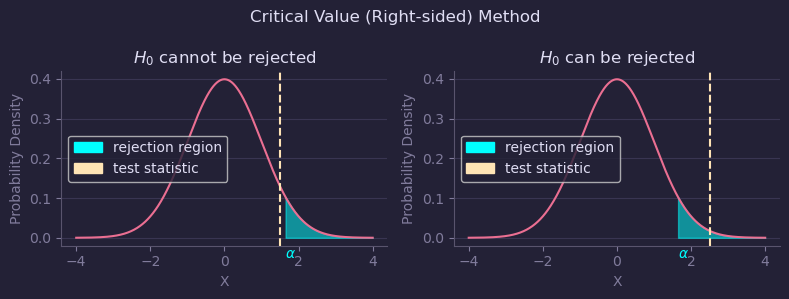

In [2]:
t = np.arange(-4, 4.01, 0.01)
norm = sc.stats.norm(0, 1)
alpha = 0.05
z_scores = [1.5, 2.5]

critical_values = [norm.ppf(1-alpha)]

fig = plt.figure(figsize=(8,3), tight_layout=True)
fig.suptitle('Critical Value (Right-sided) Method')
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    # pdf plot
    ax.plot(t, norm.pdf(t))

    # region fills

    fill_range = t[np.where(t>=critical_values[0])]
    ax.fill_between(fill_range, norm.pdf(fill_range), color='cyan', alpha=0.5)
        
    # annotations
    ax.text(critical_values[0], -0.05, r'$\alpha$', color='cyan')
    # ax.text(z_scores[i]+0.1, 0.3, 'Test statistic', color='moccasin')
    
    
    # plot labels 
    ax.axvline(z_scores[i], color='moccasin', ls='--')
    ax.set_xlabel('X')
    ax.set_ylabel('Probability Density')
    if i == 0:
        ax.set_title('$H_0$ cannot be rejected')
    elif i == 1:
        ax.set_title('$H_0$ can be rejected')
        
    # legend
    critical_label = mpatches.Patch(color='cyan', label='rejection region') 
    p_value_label = mpatches.Patch(color='moccasin', label='test statistic')
    ax.legend(handles=[critical_label, p_value_label]);

##### 3.1.2. Two Tailed Test

- Both left and right tail region has to be considered. 
- Area in both region is bounded by $-\alpha/2$ and $\alpha/2$

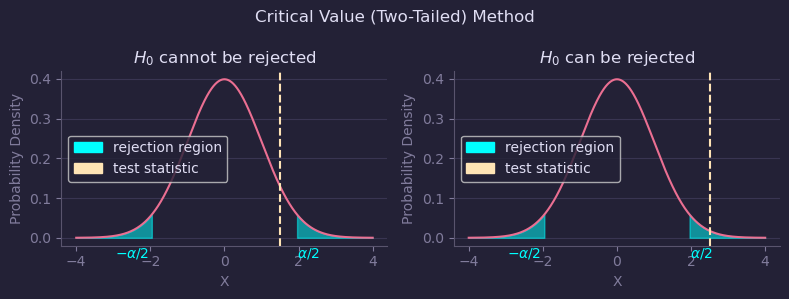

In [3]:
t = np.arange(-4, 4.01, 0.01)
norm = sc.stats.norm(0, 1)
alpha = 0.05
z_scores = [1.5, 2.5]

critical_values = [norm.ppf(alpha/2), norm.ppf(1-alpha/2)]

fig = plt.figure(figsize=(8,3), tight_layout=True)
fig.suptitle('Critical Value (Two-Tailed) Method')
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    # pdf plot
    ax.plot(t, norm.pdf(t))

    # region fills
    for j in range(2):
        if j == 0:
            fill_range = t[np.where(t<=critical_values[j])]
            ax.text(critical_values[j]-1, -0.05, r'$-\alpha/2$', color='cyan')
        elif j == 1:
            fill_range = t[np.where(t>=critical_values[j])]
            ax.text(critical_values[j], -0.05, r'$\alpha/2$', color='cyan')
            
        ax.fill_between(fill_range, norm.pdf(fill_range), color='cyan', alpha=0.5)
    
    # plot labels 
    ax.axvline(z_scores[i], color='moccasin', ls='--')
    ax.set_xlabel('X')
    ax.set_ylabel('Probability Density')
    if i == 0:
        ax.set_title('$H_0$ cannot be rejected')
    elif i == 1:
        ax.set_title('$H_0$ can be rejected')
        
    # legend
    critical_label = mpatches.Patch(color='cyan', label='rejection region') 
    p_value_label = mpatches.Patch(color='moccasin', label='test statistic')
    ax.legend(handles=[critical_label, p_value_label]);

#### 3.2. P-value Method

- In this method we compare the area under the pdf bounded by p-value corresponding to test statistic and critical value.
- If the area bound by test statistic is less than that of critical value, that is p-value is less than significance level. Then we can reject null hypothesis.
- If the area bound by test statistic is greater than that of critical value, that is p-value is greater than significance level. Then we cannot reject null hypothesis.

- The p-value can be found using the cdf as follows:<br><br>
For two-sided test: $P = 2(1-Z_{\alpha/2})$<br>
For right-sided test: $P = Z_{\alpha/2}$<br>
For left-sided test: $P = 1-Z_{\alpha/2}$
 
- Use the Decision Rule (if the p-value is less than $\alpha$, reject $H_0$).

 .

##### 3.2.1. Single Tailed Test

- For right sided test $P = Z$
- For left sided test $P = 1- Z$

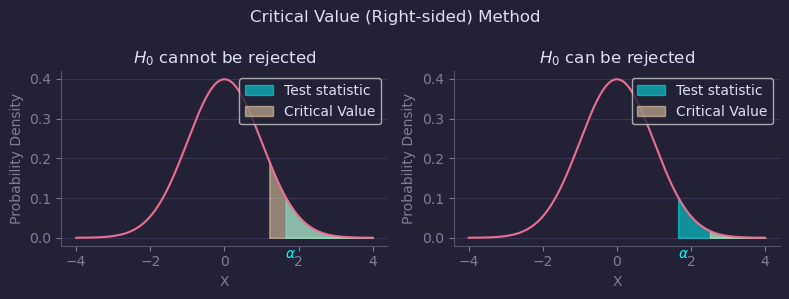

In [4]:
t = np.arange(-4, 4.01, 0.01)
norm = sc.stats.norm(0, 1)
alpha = 0.05
z_scores = [1.2, 2.5]

critical_values = [norm.ppf(1-alpha)]

fig = plt.figure(figsize=(8,3), tight_layout=True)
fig.suptitle('Critical Value (Right-sided) Method')
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    # pdf plot
    ax.plot(t, norm.pdf(t))

    # region fills
    fill_range = t[np.where(t>=critical_values[0])]
    ax.fill_between(fill_range, norm.pdf(fill_range), color='cyan', alpha=0.5, label='Test statistic')

    fill_range = t[np.where(t>=z_scores[i])]
    ax.fill_between(fill_range, norm.pdf(fill_range), color='moccasin', alpha=0.5, label='Critical Value')
        
    # annotations
    ax.text(critical_values[0], -0.05, r'$\alpha$', color='cyan')
    
    # plot labels 
    ax.set_xlabel('X')
    ax.set_ylabel('Probability Density')
    if i == 0:
        ax.set_title('$H_0$ cannot be rejected') 
    elif i == 1:
        ax.set_title('$H_0$ can be rejected')
    ax.legend()

##### 3.2.2. Two Tailed Test

- Here the region is considered corresponding to bounds $(-\infty, Z]\cap[Z, \infty)$.

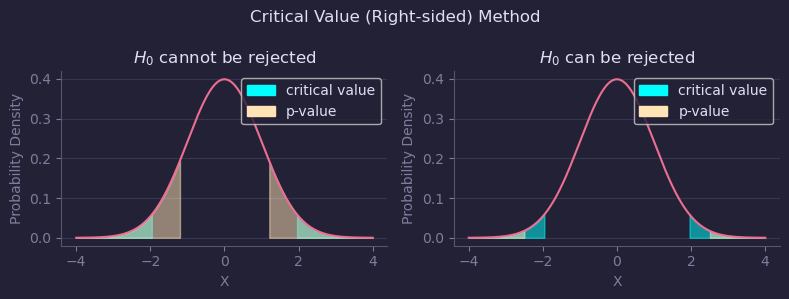

In [5]:
t = np.arange(-4, 4.01, 0.01)
norm = sc.stats.norm(0, 1)
alpha = 0.05
z_scores = [1.2, 2.5]

critical_values = [norm.ppf(alpha/2), norm.ppf(1-alpha/2)]

fig = plt.figure(figsize=(8,3), tight_layout=True)
fig.suptitle('Critical Value (Right-sided) Method')
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    # pdf plot
    ax.plot(t, norm.pdf(t))

    # region fills
    for j in range(2):
        if j == 0:
            fill_range_c = t[np.where(t<=critical_values[j])]
            fill_range_p = t[np.where(t<=-z_scores[i])]
        elif j == 1:
            fill_range_c = t[np.where(t>=critical_values[j])]
            fill_range_p = t[np.where(t>=z_scores[i])]
            
        ax.fill_between(fill_range_c, norm.pdf(fill_range_c), color='cyan', alpha=0.5)
        ax.fill_between(fill_range_p, norm.pdf(fill_range_p), color='moccasin', alpha=0.5)

    # plot labels 
    ax.set_xlabel('X')
    ax.set_ylabel('Probability Density')
    if i == 0:
        ax.set_title('$H_0$ cannot be rejected') 
    elif i == 1:
        ax.set_title('$H_0$ can be rejected')
    
    #legend
    critical_label = mpatches.Patch(color='cyan', label='critical value') 
    p_value_label = mpatches.Patch(color='moccasin', label='p-value')
    ax.legend(handles=[critical_label, p_value_label])

#### 3.3 Plotting Function

For ease of plotting in subsequent examples we define the `plot_test_statistic` function. It has two arguments:
1. *z_score*: test statisitc value.
2. *critical_values*: the critical values corresponding to significance level. If one critical value is provided we assume one tailed test, otherwise if 2 critical values are provided we assume a two tailed test.
3. *right_sided*: To differentiate between left and right sided tails.

In [6]:
def plot_test_statistic(z_score, critical_values, right_sided=True):
    t = np.arange(-4, 4.01, 0.01)
    norm = sc.stats.norm(0, 1)
    fig = plt.figure(figsize=(5,3), tight_layout=True)
    ax = fig.add_subplot(1,1,1)

    # main plot
    ax.plot(t, norm.pdf(t))
    ax.axvline(z_score, color='moccasin', ls='--')

    if len(critical_values) == 1:
        if right_sided:
            fill_range = t[np.where(t>critical_values[0])]
        else:
            fill_range = t[np.where(t<critical_values[0])]
        ax.fill_between(fill_range, norm.pdf(fill_range), color='cyan', alpha=0.5)
    elif len(critical_values) == 2:
        for i in  range(2):
            if i == 0:
                fill_range = t[np.where(t<=critical_values[i])]
            elif i == 1:
                fill_range = t[np.where(t>=critical_values[i])]
            ax.fill_between(fill_range, norm.pdf(fill_range), color='cyan', alpha=0.35)

    # labels
    ax.set_xlabel('X')
    ax.set_ylabel('Probability Density')

    # legend
    critical_label = mpatches.Patch(color='cyan', label='rejection region') 
    p_value_label = mpatches.Patch(color='moccasin', label='test statistic')
    ax.legend(handles=[critical_label, p_value_label])

### 4. Hypothesis Test for a Population Proportion

Recall that the best point estimate of p, the population proportion, is given by:
$$\hat p = \frac{x}{n}$$
where x is the number of individuals in the sample with the characteristic studied and n is the sample size. The sampling distribution of $\hat p$ is approximately normal with a mean and a standard deviation as follows:
$$\mu_{\hat p} = p \\[1em]
\sigma_{\hat p} = \sqrt{\frac{p(1-p)}{n}}
$$

#### 4.1. Single-Tailed Test

Example: In a sample of 300 corporations, 183 of CEOs were Male. Test the claim that most CEOs are male. Use significance level of 0.05.

Solution: <br>
1. $H_0: p = 0.5 \\ H_a: p > 0.5$

2. Since $H_a:p>0.5$, it is a right sided test and $\alpha = 0.05$.

3. $p = \frac{183}{300}$

In [7]:
phat = 183/300
p, alpha, n = 0.5, 0.05, 305
z = (phat - p)/((p*(1-p))/n)**0.5
norm = sc.stats.norm(0,1)
critical_values = [norm.ppf(1-alpha)]

print(
    f'Test Statistics: {z:.4f}',
    f'\nP-value: {1-norm.cdf(z):.4f}',
    f'\nSignificance Level: {alpha}'
    f'\nCritical Value: {norm.ppf(1-alpha):.4f}',
    f'\nTest Statistics > Critical Value: {z>norm.ppf(1-alpha)}',
    f'\nP-value < significance level: {1-norm.cdf(z)<alpha}'
)

Test Statistics: 3.8421 
P-value: 0.0001 
Significance Level: 0.05
Critical Value: 1.6449 
Test Statistics > Critical Value: True 
P-value < significance level: True


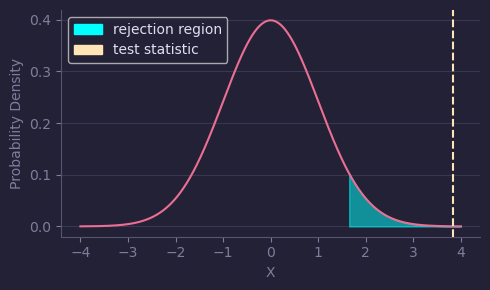

In [8]:
plot_test_statistic(z, critical_values)

Observations:
- The Test statisitc (z-score) > critical value, 3.8421 > 1.6449
- The Z-score falls in rejection region
- P-value corresponding to test statistic is less than significance level.

Thus we can reject null hypothesis and conclude that majority of CEO's in the sample of companies are male.

#### 4.2. Two-Tailed Test

**Example**: A sample of peas contain 428 and 152 yellow peas. Consider the significance level of 0.05 and try to verify whether the proportion of yellow peas in 0.25

**Solution**:<br>
1. $H_0: p = 0.25\\H_A: p \neq 0.25$
2. $\alpha = 0.05$
3. $p = \frac{152}{152+428}$


In [9]:
p, alpha = 0.25, 0.05
n = 152+428
phat = 152/n
z = (phat-p)/((p*(1-p))/n)**0.5
norm = sc.stats.norm(0,1)
critical_values = [norm.ppf(alpha/2), norm.ppf(1-alpha/2)]

print(
    f'Test Statistics: {z:.4f}',
    f'\nP-values: ({norm.cdf(-z):.4f},{1-norm.cdf(z):.4f})'
    f'\nSignificance Values: {(-alpha/2), (alpha/2)}'
    f'\nCritical Values: ({norm.ppf(alpha/2):.4f},{norm.ppf(1-alpha/2):.4f})',

)

Test Statistics: 0.6712 
P-values: (0.2510,0.2510)
Significance Values: (-0.025, 0.025)
Critical Values: (-1.9600,1.9600)


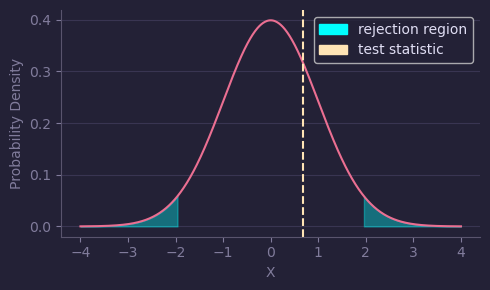

In [10]:
plot_test_statistic(z, critical_values)

Observation:
- The Test statistic is greater than critical value (left) and greater than critical value (right). -1.96 < 0.6712 < 1.96.
- The Z-score does not fall in the rejection region.
- The P-value of test statistic is greater than significance level 0.251 > 0.025.

So we cannot reject null hypothesis and no claim can be made.

### 5. Hypothesis Testing about the population mean when population standard deviation is known.

#### 5.1. Single Tailed Test

**Example**: An experiment is conducted on 100 adolescents to study *obesity in adolescents*. The mean of the weight of adults = 70.8 and the standard deviation of weight of adults = 8.65. The sample mean of weights of adolescents is 72.4. Consider the significance level be 5%. Is there enough evidence that weight of adolescents is greater than adults?

**Solution**:<br>
*A*. One sided test:
1. $H_0: \mu = 70.8 \\ H_a: \mu > 70.8$

2. $\alpha = 0.05,\; n =100, \; \sigma = 8.65, \; \bar x = 72.4$ 


In [11]:
n = 100
pop_mean = 70.8
pop_std = 8.65
sample_mean = 72.4
alpha = 0.05
norm = sc.stats.norm(0,1)
critical_values = [norm.ppf(1-alpha)]

z = (sample_mean -pop_mean) / pop_std * n**0.5 
print(
    f'Test statistic : {z:.4f}',
    f'\nCritical Value : {norm.ppf(1-alpha):.4f}'
)

Test statistic : 1.8497 
Critical Value : 1.6449


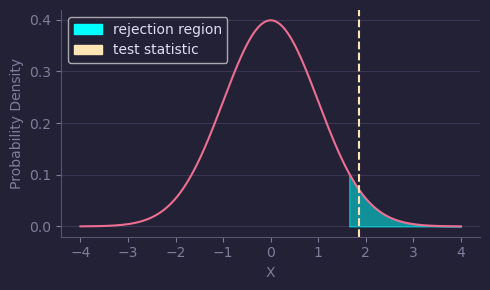

In [12]:
plot_test_statistic(z, critical_values)

Observation:
-  test statistic is greater than the critical value, 1.8947 > 1.6449.
- The Z-score falls in the rejection region.

Thus, we can reject null hypothesis, and claim that there is enough evidence for the mean weight of adolescents being higher than that of adults.

#### 5.2. Double Tailed Test

**Example**: We follow the same example. Is the mean of adolescents not equal to that of adults?

**Solution**:
B. *Two sided test*:
1. $H_0: \mu = 70.8 \\ H_a: \mu \neq 70.8$

2. $\alpha = 0.05,\; n =100, \; \sigma = 8.65, \; \bar x = 72.4$ 

In [13]:
n = 100
pop_mean = 70.8
pop_std = 8.65
sample_mean = 72.4
alpha = 0.05
norm = sc.stats.norm(0,1)
critical_values = [norm.ppf(alpha/2),norm.ppf(1-alpha/2)]

z = (sample_mean -pop_mean) / pop_std * n**0.5 
print(
    f'Test statistic : {z:.4f}',
    f'\nCritical Values : ({critical_values[0]:.4f},{critical_values[1]:.4f})'
)

Test statistic : 1.8497 
Critical Values : (-1.9600,1.9600)


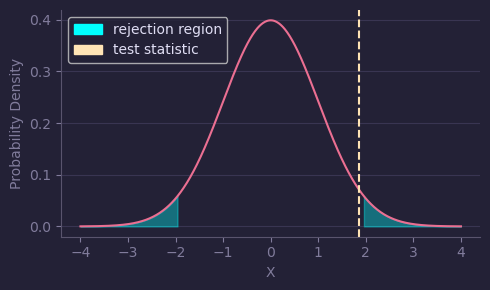

In [14]:
plot_test_statistic(z, critical_values)

Observation:
- Test statistic is less than the critical value, 1.8947 < 1.96.
- The Z-score does not fall in the rejection region.

Thus we cannot reject null hypothesis and no claims can be made.

### 6. Hypothesis Testing about population mean when population standard deviation is unkown

#### 6.1 Single Tailed Test

If population standard deviation is unkown, we would have to use sample standard deviation and thus t-statisitic.
$$T = \frac{\bar x - \mu}{\frac{s}{\sqrt{n}}}$$

**Example**: In a quality control process at a soda drink company, 39 soda cans were sampled. The mean and standard deviation of the samples was 121.1g and 2.707g. The desired mean of soda can is 120g. Is the mean of weight of can is greater 120g. Consider the significance level of 0.01.

**Solutions**:
1. $H_0: \mu \leq 120\\ H_a: \mu > 120$

2. $n = 39,\; \mu = 120, \; \bar x = 121.1 \;, s = 2.707g$

In [15]:
n = 39
pop_mean = 120
sample_mean = 121.1
sample_std = 2.707
alpha = 0.01

t = (sample_mean - pop_mean)/sample_std * n**0.5
critical_values = [sc.stats.t.ppf(1-alpha, df = n-1)]

print(
    f'Test-statistic (t-score): {t:.4f}',
    f'\nCritical Value : {critical_values[0]:.4f}',
    f'\nP-Value: {1-sc.stats.t.cdf(t, n-1):.4f}',
    f'\nSignificance level: {alpha}'
)

Test-statistic (t-score): 2.5377 
Critical Value : 2.4286 
P-Value: 0.0077 
Significance level: 0.01


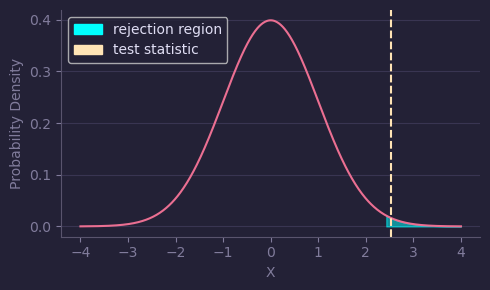

In [16]:
plot_test_statistic(t, critical_values)

*Observation*:
- The test statistic is greater than critical value.
- The Z-score falls in rejection region.

So we can reject null hypothesis and claim that mean of soda cans being produced is greater than 120g.

#### 6.2 Double Tailed Test

Now we repeat the same for two sided test. <br><br>
**Example** Following above example is there a quality problem in the can being produced.

**solution**:
1. $H_0: \mu = 120\\ H_a: \mu \neq 120$

2. $n = 39,\; \mu = 120, \; \bar x = 121.1 \;, s = 2.707g$

In [17]:
n = 39
pop_mean = 120
sample_mean = 121.1
sample_std = 2.707
alpha = 0.01

t = (sample_mean - pop_mean)/sample_std * n**0.5
critical_values = [sc.stats.t.ppf(alpha/2, df = n-1), sc.stats.t.ppf(1-alpha/2, df = n-1)]

print(
    f'Test-statistic (t-score): {t:.4f}',
    f'\nCritical Value : ({critical_values[0]:.4f}, {critical_values[1]:.4f})',
    f'\nP-Value: {1-sc.stats.t.cdf(t, n-1):.4f}',
    f'\nSignificance level: {alpha}'
)

Test-statistic (t-score): 2.5377 
Critical Value : (-2.7116, 2.7116) 
P-Value: 0.0077 
Significance level: 0.01


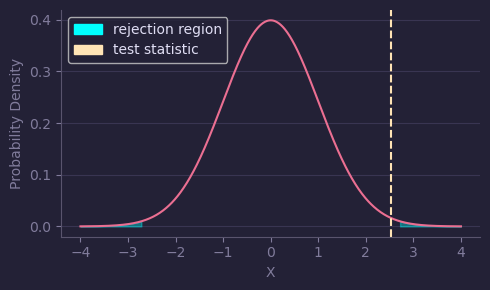

In [18]:
plot_test_statistic(t, critical_values)

*Observation*:
- The test statistic is greater than critical value.
- The Z-score does not fall in rejection region.

So we cannot reject null hypothesis and no claims can be made.

### 7. Hypothesis Testing involving Variance and Standard Deviation

For performing the hypothesis testing on point estimate $s^2$ of population variance $\sigma$ the Test statistic is as follows:
$$\chi^2 = \frac{(n-1)s^2}{\sigma_0^2}$$
Note that test statistic follows the chi-squared distribution.

**Example**: A sample of 37 coins is selected. The sample mean and standard deviation is 2.4991g and 0.01648g. The population standard deviation is known to be 0.023g. Is the population standard deviation actually less than 0.023g. Consider significance levle of 0.05.

**Solution**
1. $H_0: \sigma = 0.023 \\ H_a: \sigma < 0.023$

2. $n = 37, \; \sigma = 0.023, \; \bar x = 2.4991. \; s= 0.01648, \; \alpha = 0.05$

In [19]:
n = 37
pop_std = 0.023
sample_mean = 2.4991
sample_std = 0.01648
alpha = 0.05
chi2 = sc.stats.chi2(n-1)
critical_values = [chi2.ppf(alpha)]

chi2_val = (n-1) * sample_std**2 / pop_std**2

print(
    f'Chi-squared value : {chi2_val:.4f}',
    f'\nCritical Value: {critical_values[0]:.4f}'
)

Chi-squared value : 18.4825 
Critical Value: 23.2686


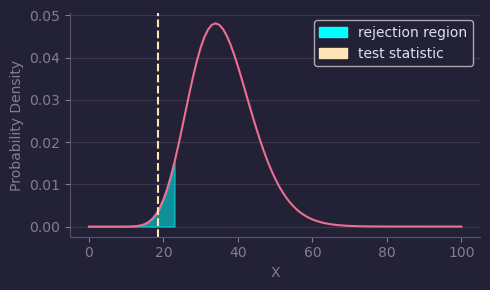

In [20]:
t = np.linspace(0, 100, 101)

fig = plt.figure(figsize=(5,3), tight_layout=True)
ax = fig.add_subplot(1,1,1)

# main plot
ax.plot(t, chi2.pdf(t))

# region fill
fill_range = t[np.where(t<critical_values[0])]
ax.fill_between(fill_range, chi2.pdf(fill_range), color='cyan', alpha=0.5)

# test statistic
ax.axvline(chi2_val, color='moccasin', ls='--')

# labels
ax.set_xlabel('X')
ax.set_ylabel('Probability Density')

# legend
critical_label = mpatches.Patch(color='cyan', label='rejection region') 
p_value_label = mpatches.Patch(color='moccasin', label='test statistic')
ax.legend(handles=[critical_label, p_value_label]);

Observation:
- The test statistic is less than critical value.
- The $\chi^2$ fall in rejection region.

So we can reject null hypothesis and claim that mean weight of coins is greater than 0.023g.